# ดัชนีราคาผู้บริโภคทั่วไป (Consumer Price Index) 

### วิเคราะห์ดัชนีราคาผู้บริโภคทั่วไปในกรุงเทพและปริมณฑล ตั้งแต่ปีค.ศ. 2017-2020

แหล่งข้อมูล: https://data.moc.go.th/OpenData/CPIGIndexes

## Query Parameters

| Name | Data type | Description | Default |
| --- | --- | --- | --- |
| region_id | Integer | รหัสภูมิภาค (0 = กรุงเทพและปริมณฑล, 1 = ภาคกลาง, 2 = ภาคตะวันออกเฉียงเหนือ, 3 = ภาคเหนือ, 4 = ภาคใต้, 5 = ประเทศ) | - |
| index_id | String | รหัสหมวด / กลุ่มดัชนี | 0000000000000000 |
| from_year | Integer | ปีที่จัดทำดัชนีเริ่มต้น (ค.ศ.) | - |
| to_year | Integer | ปีที่จัดทำดัชนีสิ้นสุด (ค.ศ.) | - |

Link API: https://dataapi.moc.go.th/cpig-indexes

Example: https://dataapi.moc.go.th/cpig-indexes?region_id=1&index_id=1000000000000000&from_year=2017&to_year=2019

- ค้นหาข้อมูลใน **ภาคกลาง**
- รหัสหมวดที่ **1000000000000000**
- ปีที่จัดทำดัชนีเริ่มต้นที่ปี **2017**
- ปีที่จัดทำดัชนีสิ้นสุดที่ปี **2020**

## Responses

Type: Array

- ผลลัพธ์จะมีการเรียงลำดับโดยปีที่จัดทำดัชนี ตามด้วยเดือนที่จัดทำดัชนี ตามด้วยรหัสภูมิภาค

| Name | Data type | Description |
| --- | --- | --- |
| index_id | String | รหัสหมวด / กลุ่มดัชนี |
| index_description | String | ชื่อหมวด / กลุ่มดัชนี |
| region_id | Integer | รหัสภูมิภาค |
| region_name | String | ชื่อภูมิภาค |
| base_year | 	Integer	 | ปีฐานดัชนี |
| year | 	Integer	 | ปีที่จัดทำดัชนี |
| month | 	Integer	 | เดือนที่จัดทำดัชนี |
| price_index | Float | ดัชนีราคา |
| mom | Float | อัตราการเปลี่ยนแปลงเทียบกับเดือนก่อนหน้า |
| yoy | Float | อัตราการเปลี่ยนแปลงเทียบกับเดือนเดียวกันปีก่อนหน้า |
| aoa | Float | อัตราการเปลี่ยนแปลงเทียบกับช่วงเดียวกันปีก่อนหน้า |

![NewText](data/response_ex.png)


## รหัสหมวด/กลุ่มดัชนี (Index_id)

In [1]:
import pandas as pd
index_id_df = pd.read_csv('data/รหัสหมวดดัชนี CPI_INDEX 31-8-2020.csv')
index_id_df

,รหัสดัชนี,ชื่อหมวด/กลุ่มดัชนี
0,0.000000e+00,รวมทุกรายการ
1,1.000000e+15,หมวดอาหารและเครื่องดื่มไม่มีแอลกอฮอล์
2,1.100000e+15,อาหารปรุงที่บ้าน
3,1.110000e+15,ข้าว แป้งและผลิตภัณฑ์จากแป้ง
4,1.111000e+15,ข้าว
...,...,...
185,9.510000e+15,น้ำมัน 91 95 ดีเซล
186,9.520000e+15,CPI ไม่รวมน้ำมัน 91 95 ดีเซล
187,9.600000e+15,CPI ไม่รวมน้ำมัน 91 95 ดีเซล และรายการของ คน.
188,9.700000e+15,CPI ไม่รวมอาหารสด


## ดึงข้อมูล

In [2]:
import json, urllib
import pandas as pd

In [3]:
CPI_Index = pd.read_csv("data/รหัสหมวดดัชนี CPI_INDEX 31-8-2020.csv")
CPI_index_id = CPI_Index['รหัสดัชนี']
CPI_index_id_list = CPI_index_id.tolist()
# CPI_index_id_list

In [4]:
data = []

def addData(lists):
    for i in range(len(lists)):
        data.append(lists[i])

In [5]:
region_id = "0" #กรุงเทพและปริมณฑล
from_year="2017"
to_year="2020"

# url = 'https://dataapi.moc.go.th/cpig-indexes?region_id=1&index_id=1000000000000000&from_year=2017&to_year=2019'

for i in CPI_index_id_list:
    url = "https://dataapi.moc.go.th/cpig-indexes?region_id=" + region_id + "&index_id=" + str(int(i)) + ('0' * (16 - len(str(int(i))) ) ) + "&from_year=" + from_year + "&to_year=" + to_year
    
    response = urllib.request.urlopen(url)
    raw_json = response.read().decode("utf-8")
    addData(json.loads(raw_json))
    
print(len(data))

7572


In [6]:
df = pd.json_normalize(data)
df

,index_id,index_description,region_id,region_name,base_year,year,month,price_index,mon,yoy,aoa
0,0000000000000000,รวมทุกรายการ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,1,100.53,0.07,1.18,1.18
1,0000000000000000,รวมทุกรายการ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,2,100.53,0.00,1.00,1.09
2,0000000000000000,รวมทุกรายการ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,3,100.18,-0.35,0.49,0.88
3,0000000000000000,รวมทุกรายการ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,4,100.34,0.16,0.18,0.71
4,0000000000000000,รวมทุกรายการ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,5,100.48,0.14,-0.04,0.56
...,...,...,...,...,...,...,...,...,...,...,...
7567,9520000000000000,"CPI ไม่รวมน้ำมัน 91 , 95 , ดีเซล",0,กรุงเทพมหานครและปริมณฑล,2015,2020,7,102.43,0.72,-0.64,-0.75
7568,9700000000000000,CPI ไม่รวมอาหารสด,0,กรุงเทพมหานครและปริมณฑล,2015,2019,11,102.45,0.04,0.19,0.39
7569,9700000000000000,CPI ไม่รวมอาหารสด,0,กรุงเทพมหานครและปริมณฑล,2015,2019,12,102.48,0.03,0.67,0.41
7570,9800000000000000,CPI ไม่รวมพลังงาน,0,กรุงเทพมหานครและปริมณฑล,2015,2019,11,103.05,-0.13,0.84,1.27


In [7]:
df.isna().sum()

index_id             0
index_description    0
region_id            0
region_name          0
base_year            0
year                 0
month                0
price_index          0
mon                  0
yoy                  0
aoa                  0
dtype: int64

## Save df to csv

In [8]:
df.to_csv('data/data.csv', header=True, index=False, encoding='utf-8-sig')

## load csv file

In [9]:
import pandas as pd

In [10]:
df = pd.read_csv('data/data.csv')
df

,index_id,index_description,region_id,region_name,base_year,year,month,price_index,mon,yoy,aoa
0,0,รวมทุกรายการ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,1,100.53,0.07,1.18,1.18
1,0,รวมทุกรายการ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,2,100.53,0.00,1.00,1.09
2,0,รวมทุกรายการ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,3,100.18,-0.35,0.49,0.88
3,0,รวมทุกรายการ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,4,100.34,0.16,0.18,0.71
4,0,รวมทุกรายการ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,5,100.48,0.14,-0.04,0.56
...,...,...,...,...,...,...,...,...,...,...,...
7567,9520000000000000,"CPI ไม่รวมน้ำมัน 91 , 95 , ดีเซล",0,กรุงเทพมหานครและปริมณฑล,2015,2020,7,102.43,0.72,-0.64,-0.75
7568,9700000000000000,CPI ไม่รวมอาหารสด,0,กรุงเทพมหานครและปริมณฑล,2015,2019,11,102.45,0.04,0.19,0.39
7569,9700000000000000,CPI ไม่รวมอาหารสด,0,กรุงเทพมหานครและปริมณฑล,2015,2019,12,102.48,0.03,0.67,0.41
7570,9800000000000000,CPI ไม่รวมพลังงาน,0,กรุงเทพมหานครและปริมณฑล,2015,2019,11,103.05,-0.13,0.84,1.27


In [11]:
countGroup = df['index_description'].groupby(df['index_description']).count()
dictCountGroup = countGroup.to_dict()
{k: v for k, v in sorted(dictCountGroup.items(), key=lambda item: item[1])}

{'CPI ไม่รวมพลังงาน': 2,
 'CPI ไม่รวมอาหารสด': 2,
 'CPI ไม่รวมน้ำมัน 91 , 95 , ดีเซล': 43,
 'กลุ่มอาหารสดและพลังงาน': 43,
 'กางเกงบุรุษ': 43,
 'กางเกงสตรีและกระโปรงสตรี': 43,
 'กางเกงเด็ก': 43,
 'การบันเทิงและการอ่าน': 43,
 'การศาสนา': 43,
 'การศึกษา': 43,
 'การศึกษาระดับประถมศึกษา': 43,
 'การศึกษาระดับมัธยมศึกษา ด้านเทคนิคและอาชีวะ': 43,
 'การศึกษาระดับมัธยมศึกษาสายสามัญ': 43,
 'การศึกษาระดับอุดมศึกษา': 43,
 'การสื่อสาร': 43,
 'ของเล่น': 43,
 'ข้าว': 43,
 'ข้าว  แป้งและผลิตภัณฑ์จากแป้ง': 43,
 'คนรับใช้ / คนงาน': 43,
 'คนไข้นอก': 43,
 'คนไข้ใน': 43,
 'ค่าการบันเทิง': 43,
 'ค่าของใช้ส่วนบุคคล': 43,
 'ค่าจ้าง': 43,
 'ค่าจ้างตัดเย็บและอุปกรณ์': 43,
 'ค่าซื้อยานพาหนะ': 43,
 'ค่าซ่อมแซม': 43,
 'ค่าซ่อมแซมและดูแลรักษา': 43,
 'ค่าตรวจรักษา ค่าบริการ และค่ายาของคนไข้ใน': 43,
 'ค่าตรวจรักษาและค่ายา': 43,
 'ค่าตรวจวินิจฉัยทางห้องปฏิบัติการ': 43,
 'ค่าตรวจสายตา': 43,
 'ค่าตรวจโรครักษา ค่าบริการ และค่ายาของคนไข้นอก': 43,
 'ค่าทำฟัน': 43,
 'ค่าที่พักอาศัย': 43,
 'ค่าธรรมเนียมและค่าสมาชิก': 43,
 'ค่

ลบแถวที่มี index_description เป็น **CPI ไม่รวมพลังงาน**และ **CPI ไม่รวมอาหารสด** เพราะมีข้อมูลน้อยไป

In [12]:
df = df[df.index_description != 'CPI ไม่รวมพลังงาน']
df = df[df.index_description != 'CPI ไม่รวมอาหารสด']
df

,index_id,index_description,region_id,region_name,base_year,year,month,price_index,mon,yoy,aoa
0,0,รวมทุกรายการ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,1,100.53,0.07,1.18,1.18
1,0,รวมทุกรายการ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,2,100.53,0.00,1.00,1.09
2,0,รวมทุกรายการ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,3,100.18,-0.35,0.49,0.88
3,0,รวมทุกรายการ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,4,100.34,0.16,0.18,0.71
4,0,รวมทุกรายการ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,5,100.48,0.14,-0.04,0.56
...,...,...,...,...,...,...,...,...,...,...,...
7563,9520000000000000,"CPI ไม่รวมน้ำมัน 91 , 95 , ดีเซล",0,กรุงเทพมหานครและปริมณฑล,2015,2020,3,102.19,-0.55,-0.05,0.53
7564,9520000000000000,"CPI ไม่รวมน้ำมัน 91 , 95 , ดีเซล",0,กรุงเทพมหานครและปริมณฑล,2015,2020,4,100.43,-1.72,-2.14,-0.14
7565,9520000000000000,"CPI ไม่รวมน้ำมัน 91 , 95 , ดีเซล",0,กรุงเทพมหานครและปริมณฑล,2015,2020,5,100.29,-0.14,-2.78,-0.66
7566,9520000000000000,"CPI ไม่รวมน้ำมัน 91 , 95 , ดีเซล",0,กรุงเทพมหานครและปริมณฑล,2015,2020,6,101.70,1.41,-1.31,-0.78


In [13]:
df[df.index_description == 'ค่าบริการอื่น ๆ']

,index_id,index_description,region_id,region_name,base_year,year,month,price_index,mon,yoy,aoa
4472,4121500000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,1,102.08,0.0,1.46,1.46
4473,4121500000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,2,102.08,0.0,1.46,1.46
4474,4121500000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,3,102.08,0.0,1.46,1.46
4475,4121500000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,4,102.08,0.0,1.46,1.46
4476,4121500000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,5,102.08,0.0,1.46,1.46
...,...,...,...,...,...,...,...,...,...,...,...
4725,4122400000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2020,3,103.82,0.0,0.00,0.00
4726,4122400000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2020,4,103.82,0.0,0.00,0.00
4727,4122400000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2020,5,103.82,0.0,0.00,0.00
4728,4122400000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2020,6,103.82,0.0,0.00,0.00


In [14]:
df_1 = df[df.index_id == 4121500000000000].drop(columns = ['index_id'])
df_2 = df[df.index_id == 4122400000000000].drop(columns = ['index_id'])
print(df_1.describe())
print()
print(df_2.describe())

       region_id  base_year         year      month   price_index   mon  \
count       43.0       43.0    43.000000  43.000000  4.300000e+01  43.0   
mean         0.0     2015.0  2018.325581   6.093023  1.020800e+02   0.0   
std          0.0        0.0     1.062811   3.428271  5.751615e-14   0.0   
min          0.0     2015.0  2017.000000   1.000000  1.020800e+02   0.0   
25%          0.0     2015.0  2017.000000   3.000000  1.020800e+02   0.0   
50%          0.0     2015.0  2018.000000   6.000000  1.020800e+02   0.0   
75%          0.0     2015.0  2019.000000   9.000000  1.020800e+02   0.0   
max          0.0     2015.0  2020.000000  12.000000  1.020800e+02   0.0   

             yoy        aoa  
count  43.000000  43.000000  
mean    0.339535   0.398605  
std     0.624095   0.649485  
min     0.000000   0.000000  
25%     0.000000   0.000000  
50%     0.000000   0.000000  
75%     0.000000   1.270000  
max     1.460000   1.460000  

       region_id  base_year         year      month  

In [15]:
df = df[df.index_id != 4122400000000000]
df[df.index_description == 'ค่าบริการอื่น ๆ']

,index_id,index_description,region_id,region_name,base_year,year,month,price_index,mon,yoy,aoa
4472,4121500000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,1,102.08,0.0,1.46,1.46
4473,4121500000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,2,102.08,0.0,1.46,1.46
4474,4121500000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,3,102.08,0.0,1.46,1.46
4475,4121500000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,4,102.08,0.0,1.46,1.46
4476,4121500000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,5,102.08,0.0,1.46,1.46
4477,4121500000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,6,102.08,0.0,1.46,1.46
4478,4121500000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,7,102.08,0.0,1.46,1.46
4479,4121500000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,8,102.08,0.0,1.46,1.46
4480,4121500000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,9,102.08,0.0,1.46,1.46
4481,4121500000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,10,102.08,0.0,1.46,1.46


In [18]:
{k: v for k, v in sorted(dictCountGroup.items(), key=lambda item: item[1])}

{'CPI ไม่รวมน้ำมัน 91 , 95 , ดีเซล': 43,
 'กลุ่มอาหารสดและพลังงาน': 43,
 'กางเกงบุรุษ': 43,
 'กางเกงสตรีและกระโปรงสตรี': 43,
 'กางเกงเด็ก': 43,
 'การบันเทิงและการอ่าน': 43,
 'การศาสนา': 43,
 'การศึกษา': 43,
 'การศึกษาระดับประถมศึกษา': 43,
 'การศึกษาระดับมัธยมศึกษา ด้านเทคนิคและอาชีวะ': 43,
 'การศึกษาระดับมัธยมศึกษาสายสามัญ': 43,
 'การศึกษาระดับอุดมศึกษา': 43,
 'การสื่อสาร': 43,
 'ของเล่น': 43,
 'ข้าว': 43,
 'ข้าว  แป้งและผลิตภัณฑ์จากแป้ง': 43,
 'คนรับใช้ / คนงาน': 43,
 'คนไข้นอก': 43,
 'คนไข้ใน': 43,
 'ค่าการบันเทิง': 43,
 'ค่าของใช้ส่วนบุคคล': 43,
 'ค่าจ้าง': 43,
 'ค่าจ้างตัดเย็บและอุปกรณ์': 43,
 'ค่าซื้อยานพาหนะ': 43,
 'ค่าซ่อมแซม': 43,
 'ค่าซ่อมแซมและดูแลรักษา': 43,
 'ค่าตรวจรักษา ค่าบริการ และค่ายาของคนไข้ใน': 43,
 'ค่าตรวจรักษาและค่ายา': 43,
 'ค่าตรวจวินิจฉัยทางห้องปฏิบัติการ': 43,
 'ค่าตรวจสายตา': 43,
 'ค่าตรวจโรครักษา ค่าบริการ และค่ายาของคนไข้นอก': 43,
 'ค่าทำฟัน': 43,
 'ค่าที่พักอาศัย': 43,
 'ค่าธรรมเนียมและค่าสมาชิก': 43,
 'ค่าบริการการสื่อสาร': 43,
 'ค่าบริการด้านรังสี': 43,

## Save clean data to csv

In [17]:
df.to_csv('data/clean_data.csv', header=True, index=False, encoding='utf-8-sig')

## Visualization

In [23]:
df

,index_id,index_description,region_id,region_name,base_year,year,month,price_index,mon,yoy,aoa
0,0,รวมทุกรายการ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,1,100.53,0.07,1.18,1.18
1,0,รวมทุกรายการ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,2,100.53,0.00,1.00,1.09
2,0,รวมทุกรายการ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,3,100.18,-0.35,0.49,0.88
3,0,รวมทุกรายการ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,4,100.34,0.16,0.18,0.71
4,0,รวมทุกรายการ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,5,100.48,0.14,-0.04,0.56
...,...,...,...,...,...,...,...,...,...,...,...
7563,9520000000000000,"CPI ไม่รวมน้ำมัน 91 , 95 , ดีเซล",0,กรุงเทพมหานครและปริมณฑล,2015,2020,3,102.19,-0.55,-0.05,0.53
7564,9520000000000000,"CPI ไม่รวมน้ำมัน 91 , 95 , ดีเซล",0,กรุงเทพมหานครและปริมณฑล,2015,2020,4,100.43,-1.72,-2.14,-0.14
7565,9520000000000000,"CPI ไม่รวมน้ำมัน 91 , 95 , ดีเซล",0,กรุงเทพมหานครและปริมณฑล,2015,2020,5,100.29,-0.14,-2.78,-0.66
7566,9520000000000000,"CPI ไม่รวมน้ำมัน 91 , 95 , ดีเซล",0,กรุงเทพมหานครและปริมณฑล,2015,2020,6,101.70,1.41,-1.31,-0.78


### Line plot

In [55]:
from __future__ import unicode_literals
import matplotlib.pyplot as plt
%matplotlib inline

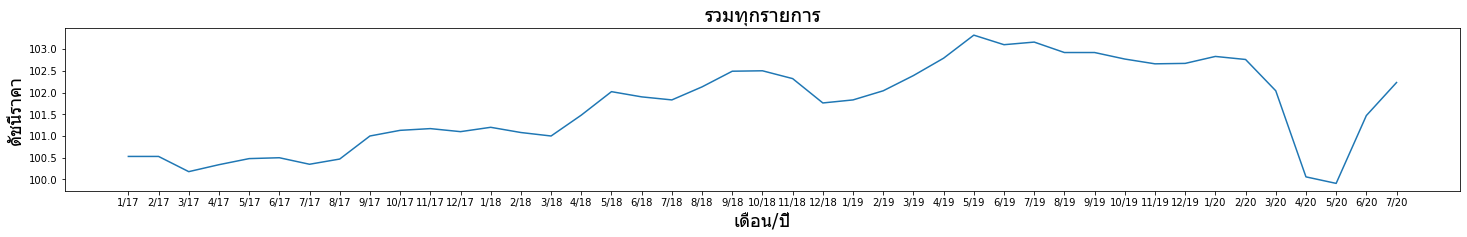

In [73]:
index_ = df[df.index_id == 0]

month = index_['month'].tolist()
year = index_['year'].tolist()

values = index_['price_index'].tolist()

month_year = []
for i in range(len(month)):
    month_year.append(str(month[i]) + '/' + str(year[i])[2:] )

plt.figure(figsize=(25, 3))

plt.title(u'รวมทุกรายการ',fontname='Tahoma',fontsize='20')
plt.xlabel(u'เดือน/ปี',fontname='Tahoma',fontsize='18')
plt.ylabel(u'ดัชนีราคา',fontname='Tahoma',fontsize='18')
plt.plot(month_year, values)